<a href="https://colab.research.google.com/github/filmer2002/RASH_INSPECTOR/blob/master/hand_ResNet50_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ResNet50**
Let's implement !!!

In [0]:
import tensorflow as tf
import keras
from keras import models
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.resnet import ResNet50
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from vis.utils import utils
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import PIL
import cv2

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!git clone https://github.com/filmer2002/RASH_INSPECTOR_data

fatal: destination path 'RASH_INSPECTOR_data' already exists and is not an empty directory.


In [0]:
train_path = '/content/RASH_INSPECTOR_data/hand/train'
val_path = '/content/RASH_INSPECTOR_data/hand/val'
test_path = '/content/RASH_INSPECTOR_data/hand/test'

In [0]:
img_size = 224
epochs = 50
batch_size = 32

In [0]:
train_norm = ImageDataGenerator(rescale=1. / 255) 
val_norm = ImageDataGenerator(rescale=1. / 255) 
test_norm = ImageDataGenerator(rescale=1. / 255) 

In [0]:
train_generator = train_norm.flow_from_directory( 
    train_path, 
    target_size=(img_size, img_size), 
    batch_size=batch_size)

val_generator = val_norm.flow_from_directory( 
    val_path, 
    target_size=(img_size, img_size), 
    batch_size=batch_size)

test_generator = test_norm.flow_from_directory( 
    test_path, 
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    shuffle=False)

Found 400 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [0]:
num_train_files = len(train_generator.filenames)
num_train_classes = len(train_generator.class_indices)
print('num_train_files', num_train_files, '&', 'num_train_classes', num_train_classes )

num_val_files = len(val_generator.filenames)
num_val_classes = len(val_generator.class_indices)
print('num_val_files', num_val_files, '&', 'num_val_classes', num_val_classes )

num_test_files = len(test_generator.filenames)
num_test_classes = len(test_generator.class_indices)
print('num_test_files', num_test_files, '&', 'num_test_classes', num_test_classes )

num_train_files 400 & num_train_classes 2
num_val_files 50 & num_val_classes 2
num_test_files 50 & num_test_classes 2


In [0]:
train_steps = np.ceil(num_train_files/batch_size)
val_steps = np.ceil(num_val_files/batch_size)

In [0]:
model = ResNet50(weights='imagenet')













102973440/102967424 [==============================] - 3s 0us/step


In [0]:
x = model.layers[-2].output
predictions = Dense(num_train_classes, activation='softmax')(x)
model = Model(inputs=model.input, outputs=predictions)

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [0]:
model.compile(Adam(lr=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model_path = '/content/drive/My Drive/โครงงานผื่น/RASH_INSPECTOR/ORGAN/hand/ResNet50/hand_resnet50_model.h5'

In [0]:
checkpoint = ModelCheckpoint(model_path, monitor='val_acc', verbose=1,
                             save_best_only=True, mode='max')

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [0]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2,
                              verbose=1, mode='max', min_lr=0.00001)

In [0]:
log_dir = '/content/drive/My Drive/โครงงานผื่น/RASH_INSPECTOR/ORGAN/hand/ResNet50/tf-log/'
tb_cb = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

In [0]:
cb_list = [checkpoint, early_stop, reduce_lr, tb_cb]

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps,
                              validation_data=val_generator,
                              validation_steps=val_steps,
                              epochs=epochs,
                              verbose=1,
                              callbacks=cb_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Epoch 1/50
13/13 [==============================] - 16s 1s/step - loss: 1.5363 - acc: 0.5716 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to /content/drive/My Drive/โครงงานผื่น/RASH_INSPECTOR/ORGAN/hand/ResNet50/hand_resnet50_model.h5

Epoch 2/50
13/13 [==============================] - 3s 222ms/step - loss: 0.9373 - acc: 0.5938 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/50
13/13 [==============================] - 3s 224ms/step - loss: 1.2938 - acc: 0.5985 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
Epoch 4/50
13/13 [==============================] - 3s 225ms/step - loss: 0.7755 - acc: 0.6245 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00004: val_acc did not

In [0]:
model.save_weights('/content/drive/My Drive/โครงงานผื่น/RASH_INSPECTOR/ORGAN/hand/ResNet50/hand_resnet50_weights.h5')

In [0]:
model.load_weights(model_path)

val_loss, val_acc = \
model.evaluate_generator(test_generator, 
                        steps=val_steps)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.7630168437957764
val_acc: 0.76


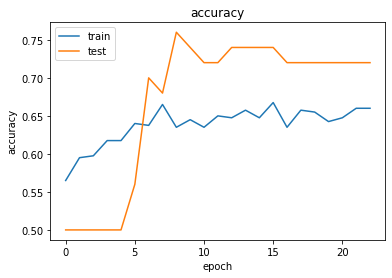

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('accuracy')
plt.show()

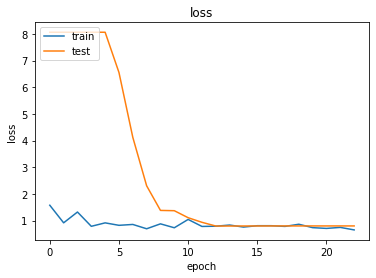

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('loss')
plt.show()

In [0]:
Y_pred = model.predict_generator(test_generator, num_test_files//batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
classes_names = ['AD', 'Other']
print(classification_report(test_generator.classes, y_pred, target_names=classes_names))

Confusion Matrix
[[13 12]
 [ 0 25]]
Classification Report
              precision    recall  f1-score   support

          AD       1.00      0.52      0.68        25
       Other       0.68      1.00      0.81        25

    accuracy                           0.76        50
   macro avg       0.84      0.76      0.75        50
weighted avg       0.84      0.76      0.75        50



In [0]:
predictions = model.predict_generator(test_generator, steps=val_steps, verbose=1)

2/2 [==============================] - 0s 83ms/step


In [0]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
cm_plot_labels = ['AD', 'Other']

Confusion matrix, without normalization
[[13 12]
 [ 0 25]]


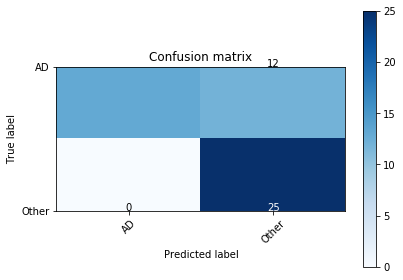

In [0]:
cm = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
plot_confusion_matrix(cm, cm_plot_labels)